In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import io, os, base64
import numpy as np
import pandas as pd
from flask import Flask, render_template, flash, request, jsonify, Markup

In [95]:
selected_country = 'Kenya'

In [106]:
def k_function(selected_country):
    datapath = "/home/helix/Documents/UNAIDS/Data_sources/"
    lawsfile = "NCPI_2020_en.csv"
    kpfile = "KPAtlasDB_2020_en.csv"
    column_names=('Indicator','Unit','Subgroup','Area','Area ID','Time Period','Source','Data Value')
    kp_data = pd.read_csv(datapath+kpfile,usecols=column_names)
    expenditfile = "GARPR16-GAM2020ProgrammeExpenditures.xlsx"
    ex_data = pd.read_excel(datapath+expenditfile)
    ex_data.rename(columns=dict(zip(ex_data.columns[1:10],[str(int(a)) for a in ex_data.iloc[3,1:10]])),inplace=True)
    ex_data.rename(columns={'Reporting cycle':'Countries','Unnamed: 10':'Total'},inplace=True)
    ex_data.drop(labels=[0,1,2,3],axis='index',inplace=True)
    ex_data.reset_index(drop=True)

    # epidemic transition metrics
    epidemicfile = "NewHIVinfections.xlsx"
    ep_data = pd.read_excel(datapath+epidemicfile, dtype=str)
    for year in range(2011,2020):
        for ind in ep_data.index:
            if len(ep_data.loc[ind,str(year)]) > 0:
                x = ep_data.loc[ind,str(year)]
                if re.findall(r"^\d+\s\d*",x):
                    ep_data.loc[ind,str(year)] = float(re.findall(r"^\d+\s\d*",x)[0].replace(" ",""))
                else:
                    ep_data.loc[ind,str(year)] = math.nan
            else:
                ep_data.loc[ind,str(year)] = math.nan

    plt.xlim(0,1500)
    plt.ylim(0,175000)

    data = {}
    for country in ex_data['Countries']:
        data[country] = {'years':[],'epdata':[],'exdata':[]}    
        for year in range(2011,2020):
            #ep_data[str(year)] = ep_data[str(year)].apply(lambda x: int(re.findall(r"^\d+\s\d*",x)[0].replace(" ","")) 
            #            if len(x)>0 and re.findall(r"^\d+\s\d*",x)
            #            else None)

            x = ex_data.loc[ex_data['Countries']==country,str(year)].values
            y = ep_data.loc[ep_data['Country']==country,str(year)].values
            if x and y and not ( math.isnan(x) or math.isnan(y) ):
                data[country]['years'].append(year)
                data[country]['epdata'].append(y)
                data[country]['exdata'].append(x/1000000)

    for country in data:
        country = selected_country
        if len(data[country]['exdata']) > 0 and len(data[country]['epdata']) > 0:
            plt.plot(data[country]['exdata'],data[country]['epdata'])
            plt.plot(data[country]['exdata'][-1],data[country]['epdata'][-1],'ro')
            plt.text(data[country]['exdata'][-1],data[country]['epdata'][-1],country)

        break
    plt.xlabel('Expenditures on HIV prevention (millions USD)')
    plt.ylabel('Number of people living with HIV')

    img1 = io.BytesIO()
    plt.savefig(img1, format='png')
    img1.seek(0)
    plot_url1 = base64.b64encode(img1.getvalue()).decode()
    plot_to_show1 = Markup('<img src="data:image/png;base64,{}" style="width:100%;vertical-align:top">'.format(plot_url1))
    
    return plot_to_show1

<ipython-input-106-958a7cd3dc70>:41: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x and y and not ( math.isnan(x) or math.isnan(y) ):


Markup('')
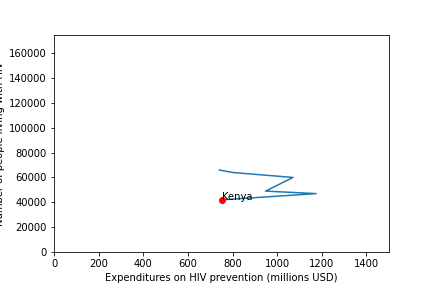

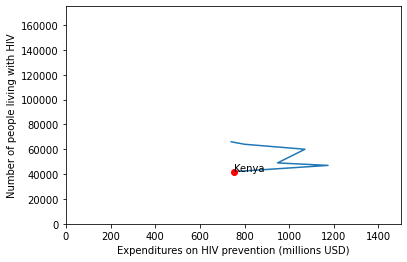

In [107]:
plot_to_show1 = k_function(selected_country)

In [28]:
p = pd.DataFrame.from_dict(data, orient="index")

In [39]:
p[p.index == 'Kenya']

,years,epdata,exdata
Kenya,"[2012, 2013, 2014, 2016, 2017, 2019]","[[66000.0], [64000.0], [60000.0], [49000.0], [...","[[740.55143143], [800.4513161], [1070.66788705..."


In [49]:
kenya['exdata']kenya['exdata']kenya['exdata']kenya['exdata']kenya['exdata'](kenya['exdata'][-1])#, kenya['epdata'])

[array([740.55143143]),
 array([800.4513161]),
 array([1070.66788705]),
 array([948.00218078]),
 array([1174.39470973]),
 array([754.58532171])]

In [60]:
for i in (kenya['exdata'][-1][-1]):
    print(i)

754.585321710526


In [75]:
import os
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

In [76]:
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined